In [4]:
import pandas as pd
res_df = pd.read_csv(
    'kaggle-survey-2017/multipleChoiceResponses.csv',
    encoding='ISO-8859-1',
    low_memory=False)

In [5]:
res_df.shape

(16716, 228)

In [6]:
res_df.iloc[:3, :3]

,GenderSelect,Country,Age
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN
1,Female,United States,30.0
2,Male,Canada,28.0


In [9]:
res_df['Age'].head()

0     NaN
1    30.0
2    28.0
3    56.0
4    38.0
Name: Age, dtype: float64

In [13]:
res_df[['Age', 'Country']].head()

,Age,Country
0,NaN,NaN
1,30.0,United States
2,28.0,Canada
3,56.0,United States
4,38.0,Taiwan


In [14]:
res_df.loc[10, 'Country']

'Russia'

In [15]:
res_df.loc[10:12, ['Country', 'Age']]

,Country,Age
10,Russia,20.0
11,India,27.0
12,Brazil,26.0


In [18]:
res_df.iloc[4, :].head()

GenderSelect                      Male
Country                         Taiwan
Age                                 38
EmploymentStatus    Employed full-time
StudentStatus                      NaN
Name: 4, dtype: object

In [19]:
res_df.iloc[[True, False, True],[False, True, True]]

,Country,Age
0,NaN,NaN
2,Canada,28.0


In [20]:
res_df.loc[res_df['Age'] > 50].iloc[:5, :3]

,GenderSelect,Country,Age
3,Male,United States,56.0
13,Male,Netherlands,54.0
15,Male,United States,58.0
16,Male,Italy,58.0
26,Male,Netherlands,51.0


In [22]:
groupby_country = res_df.groupby('Country')
groupby_country

In [24]:
groupby_country.count().iloc[:3,:3]

,GenderSelect,Age,EmploymentStatus
Country,,,
Argentina,92,92,92
Australia,421,409,421
Belarus,54,54,54


In [25]:
groupby_country.count()

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,92,92,92,3,3,88,24,84,82,83,...,13,13,13,13,13,13,13,13,13,13
Australia,421,409,421,23,23,334,81,285,280,283,...,77,74,75,75,74,75,75,76,76,75
Belarus,54,54,54,2,2,47,20,39,38,37,...,7,7,7,7,7,7,7,7,7,7
Belgium,91,91,91,3,3,82,17,67,67,67,...,9,9,9,9,9,9,8,9,9,9
Brazil,465,464,465,27,29,390,98,350,339,343,...,98,96,97,97,96,97,97,95,97,97
Canada,440,431,440,33,33,353,76,309,301,305,...,90,90,90,90,89,90,90,90,90,90
Chile,51,51,51,2,2,44,5,42,40,40,...,7,7,7,7,6,8,7,6,6,7
Colombia,113,113,113,5,5,96,20,93,91,92,...,24,23,23,23,23,23,23,23,23,23
Czech Republic,53,53,53,0,0,50,5,46,46,46,...,4,4,4,4,4,4,4,4,4,4


In [26]:
res_df['Age'].head()

0     NaN
1    30.0
2    28.0
3    56.0
4    38.0
Name: Age, dtype: float64

In [27]:
res_df['Age'].fillna(res_df['Age'].mean()).head()

0    32.372841
1    30.000000
2    28.000000
3    56.000000
4    38.000000
Name: Age, dtype: float64

In [30]:
count_df = res_df[['Country', 'Age']].copy()
count_df['Age'] = count_df['Age'].fillna(count_df['Age'].mean())
groupby_country = count_df.groupby('Country')
groupby_country_count = groupby_country.count()

In [31]:
groupby_country_count.head()

,Age
Country,
Argentina,92
Australia,421
Belarus,54
Belgium,91
Brazil,465


In [32]:
groupby_country_count.sort_values('Age', ascending=False).head()

,Age
Country,
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535


In [33]:
groupby_country_count.sort_values('Age').head()

,Age
Country,
Chile,51
Norway,53
Czech Republic,53
Belarus,54
Romania,59


In [35]:
drop_other = groupby_country_count.drop('Other')
top12_countries = drop_other.sort_values('Age', ascending=False).index[:12]

In [36]:
top12_countries

Index(['United States', 'India', 'Russia', 'United Kingdom',
       'People 's Republic of China', 'Brazil', 'Germany', 'France', 'Canada',
       'Australia', 'Spain', 'Japan'],
      dtype='object', name='Country')

In [37]:
res_df.set_index('Country', inplace=True)

In [38]:
res_df.iloc[:3,:3]

,GenderSelect,Age,EmploymentStatus
Country,,,
NaN,"Non-binary, genderqueer, or gender non-conforming",NaN,Employed full-time
United States,Female,30.0,"Not employed, but looking for work"
Canada,Male,28.0,"Not employed, but looking for work"


In [39]:
drop_countries = res_df.index.difference(top12_countries)

In [40]:
drop_countries[:5]

Index([nan, 'Argentina', 'Belarus', 'Belgium', 'Chile'], dtype='object', name='Country')

In [41]:
res_df.drop(drop_countries, inplace=True)

In [42]:
res_df.shape

(11310, 227)

In [43]:
res_df.index.unique()

Index(['United States', 'Canada', 'Brazil', 'India', 'Australia', 'Russia',
       'United Kingdom', 'Germany', 'People 's Republic of China', 'Japan',
       'France', 'Spain'],
      dtype='object', name='Country')

In [44]:
res_df[['CompensationAmount', 'CompensationCurrency']].dropna().head()

,CompensationAmount,CompensationCurrency
Country,,
United States,"250,000",USD
Australia,80000,AUD
Russia,1200000,RUB
India,"95,000",INR
United States,20000,USD


In [46]:
compensation_amount = res_df['CompensationAmount']
compensation_amount = compensation_amount.str.replace(',', '')
compensation_amount = compensation_amount.str.replace('-', 'nan')

In [47]:
compensation_amount.head()

Country
United States       NaN
Canada              NaN
United States    250000
Brazil              NaN
United States       NaN
Name: CompensationAmount, dtype: object

In [48]:
compensation_amount = compensation_amount.astype(float)

In [49]:
compensation_amount.head()

Country
United States         NaN
Canada                NaN
United States    250000.0
Brazil                NaN
United States         NaN
Name: CompensationAmount, dtype: float64

In [51]:
rates_df = pd.read_csv('kaggle-survey-2017/conversionRates.csv', index_col='originCountry')

In [53]:
compensation_amount_df = pd.DataFrame(compensation_amount.values, index=res_df['CompensationCurrency'], columns=['CompensationAmount'])

In [54]:
compensation_amount_df.head()

,CompensationAmount
CompensationCurrency,
NaN,NaN
NaN,NaN
USD,250000.0
NaN,NaN
NaN,NaN


In [55]:
compensation_amount_df['exchangeRate'] = rates_df['exchangeRate']

In [56]:
compensation_amount_df.dropna().head()

,CompensationAmount,exchangeRate
CompensationCurrency,,
USD,250000.0,1.000000
AUD,80000.0,0.802310
RUB,1200000.0,0.017402
INR,95000.0,0.015620
USD,20000.0,1.000000


In [57]:
compensation_amount_usd = compensation_amount_df['CompensationAmount'] * compensation_amount_df['exchangeRate']

In [58]:
compensation_amount_usd.dropna().head()

CompensationCurrency
USD    250000.0
AUD     64184.8
RUB     20882.4
INR      1483.9
USD     20000.0
dtype: float64

In [59]:
compensation_amount_usd.describe()

count    2.970000e+03
mean     9.681715e+06
std      5.192516e+08
min      0.000000e+00
25%      2.892150e+04
50%      6.500000e+04
75%      1.100000e+05
max      2.829740e+10
dtype: float64

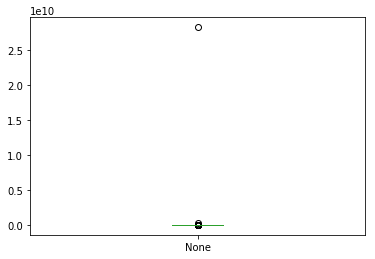

In [60]:
%matplotlib inline
compensation_amount_usd.plot.box()

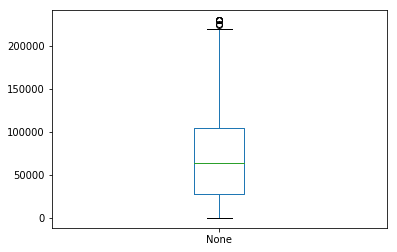

In [63]:
q1, q3 = compensation_amount_usd.describe()[['25%', '75%']]
threshold = q3 + (q3 - q1) * 1.5
compensation_amount_usd = compensation_amount_usd.where(compensation_amount_usd < threshold)
compensation_amount_usd.plot.box()

In [64]:
res_df['CompensationAmountUSD'] = compensation_amount_usd.values

In [68]:
res_df.iloc[6:8, -3:]

,JobFactorDiversity,JobFactorPublishingOpportunity,CompensationAmountUSD
Country,,,
Australia,NaN,NaN,64184.8
Russia,NaN,NaN,20882.4


In [70]:
wt_freq_df = res_df.loc[:, res_df.columns.str.startswith('WorkToolsFrequency')].copy()

In [71]:
wt_freq_df.iloc[:3, :3]

,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss
Country,,,
United States,NaN,NaN,NaN
Canada,NaN,NaN,NaN
United States,Rarely,Often,NaN


In [73]:
wt_freq_df.columns = wt_freq_df.columns.map(lambda x: x.replace('WorkToolsFrequency',''))

In [74]:
wt_freq_df.iloc[:3, :3]

,AmazonML,AWS,Angoss
Country,,,
United States,NaN,NaN,NaN
Canada,NaN,NaN,NaN
United States,Rarely,Often,NaN


In [79]:
wt_freq_df.iloc[:, 0].dropna().head()

Country
United States        Rarely
Japan                Rarely
United States     Sometimes
United States     Sometimes
United Kingdom        Often
Name: AmazonML, dtype: object

In [83]:
freqs = wt_freq_df.iloc[:, 0].unique()

In [84]:
freqs

array([nan, 'Rarely', 'Sometimes', 'Often', 'Most of the time'], dtype=object)

In [85]:
freqs2 = wt_freq_df.iloc[:, 1].unique()

In [86]:
freqs2

array([nan, 'Often', 'Rarely', 'Sometimes', 'Most of the time'], dtype=object)

In [87]:
freqs3 = wt_freq_df.iloc[:, 1].unique()

In [88]:
freqs3

array([nan, 'Often', 'Rarely', 'Sometimes', 'Most of the time'], dtype=object)

In [91]:
wt_freq_count_df = pd.DataFrame([], index=wt_freq_df.columns)

In [92]:
for freq in freqs[1:]:
    wt_freq_count_df[freq] = (wt_freq_df == freq).sum()

In [93]:
wt_freq_count_df.head()

,Rarely,Sometimes,Often,Most of the time
AmazonML,112,96,52,17
AWS,247,368,382,394
Angoss,6,5,2,2
C,248,331,215,203
Cloudera,59,90,83,76


In [95]:
wt_freq_count_df ['total'] = wt_freq_count_df.sum(axis=1)

In [96]:
wt_freq_count_df.sort_values('total', ascending=False, inplace=True)

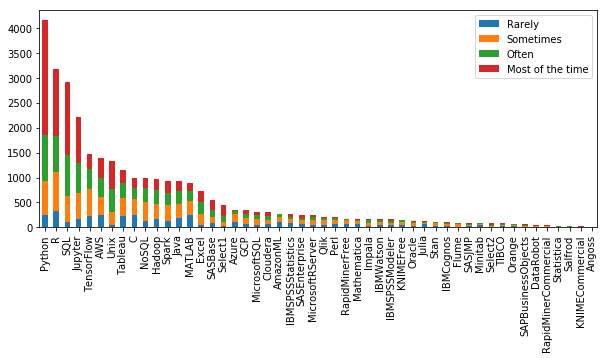

In [97]:
wt_freq_count_df.iloc[:, :-1].plot.bar(stacked=True, figsize=(10,4))

In [100]:
wt_freq_count_df.iloc[:, :-1]

,Rarely,Sometimes,Often,Most of the time
Python,241,699,908,2304
R,326,795,719,1339
SQL,117,513,825,1455
Jupyter,174,521,589,939
TensorFlow,225,554,399,292
AWS,247,368,382,394
Unix,55,245,468,572
Tableau,221,376,286,271
C,248,331,215,203
NoSQL,127,376,284,195


In [101]:
tools_salary_df = wt_freq_df.copy()

In [102]:
tools_salary_df = (tools_salary_df == 'Most of the time') | (tools_salary_df == 'Often')

In [103]:
for tool in tools_salary_df.columns:
    tools_salary_df[tool] = res_df['CompensationAmountUSD'].where(tools_salary_df[tool])

In [104]:
sort_by_median = tools_salary_df.median().sort_values(ascending=False).index

In [105]:
sort_by_median[:5]

Index(['DataRobot', 'SASJMP', 'MicrosoftRServer', 'AWS', 'IBMSPSSModeler'], dtype='object')

In [106]:
tools_salary_df = tools_salary_df.loc[:, sort_by_median]

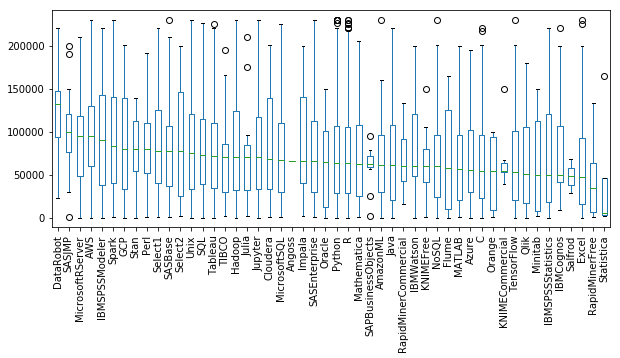

In [109]:
tools_salary_df.plot.box(figsize=(10,4), rot=90)

In [110]:
res_df.to_pickle('res_df.pickle')
wt_freq_count_df.to_pickle('wt_freq_count_df.pickle')
tools_salary_df.to_pickle('tools_salary_df.pickle')

# Jupyterの使い方
**Markdown**記法で書けます。
